# EE 538: Analog Circuits for Sensor Systems
## Autumn 2020
## Instructor: Jason Silver

## Announcements

 - Solution to Assignment 2 posted on JupyterHub
 - Assignment 3 due Sunday, October 25 at midnight
    - Jupyter Notebook (.ipyb) submission on Canvas
    - For LTspice problems, include image (e.g. screen capture) of schematic(s)

## Week 4

 - Art of Electronics (AoE) Chapters 4
 - Microelectronics (Sedra/Smith) Chapter 2

## Overview

 - Last time...
    - Common-emitter amplifier, cont.
    - Emitter-follower
    - Field-effect transistor
    - Small-signal FET model
 - Today...
     - Ideal opamp
     - Opamp characteristics
     - Opamp frequency response
     - Feedback
     - Offset
     - Bias current


## Python packages/modules

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib notebook

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))

    return x, y, z

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])

# Lecture 4 - Opamps

## Texas Instruments LM741

<center><img src="img/LM741.png" width=1000 /></center>

 - The LM741 is a general purpose "classic" opamp available from Texas Instruments
 - If we look closely, we can see that this amplifier is constructed using familiar structures
 - For example, $Q_1$ and $Q_2$ form a common-emitter differential pair, the core gain stage of the amplifier 
 - $Q_3$, $Q_4$, $R_1$, and $R_2$ serve to increase the output impedance, and thus the gain, of the first stage
 - $C_1$ is an internal compensation capacitor that sets the opamp bandwidth
 - $Q_{14}$ and $Q_{20}$ form a "push-pull" emitter follower output stage

## Ideal Opamp

<center><img src="img/opamp_model.png" width=500 /></center>

$$ R_{in} \rightarrow \infty $$


$$ R_{out} \rightarrow 0 $$


$$ A_{0} \rightarrow \infty $$

 - An opamp converts a differential input voltage $v^+$ to an output voltage $v_{out}$ via the relation
 
 $$ v_{out} = A_0\cdot (v^+ - v^-)$$
 
 - For an ideal opamp, both gain and input resistance are infinite, while output resistance is zero
 - An ideal opamp's output changes instantaneously with a change in the input
 - An ideal opamp contributes no offset or added noise to the signal
 
 

## Opamp golden rules

<center><img src="img/opamp_symbol.png" width=400 /></center>

$$ A_0 \rightarrow \infty $$ $$\rightarrow  v^+ = v^-$$

$$ i^+ = i^- = 0 $$

 When analyzing opamp circuits, always keep in mind the following "golden rules"
 1. The opamp tries to do whatever it takes to make the voltage difference between the inputs zero
 2. The input(s) draw no current
 

## Ideal inverting amplifier

<center><img src="img/ideal_inverting.png" width=500 /></center>

$$ v^- = v^+ = 0 $$

$$ v_{out} = 0 - \frac{v_{in}}{R_i}\cdot R_f $$

$$ G_0 = \frac{v_{out}}{v_{in}} = -\dfrac{R_f}{R_i} $$

 - Infinite DC gain ensures that the voltage at the inverting terminal $v^-$ is maintained at ground
 - The "zero-input-current" property of the opamp ensures that the current through $R_f$ is equal to that through $R_i$
 - For an ideal opamp, the *closed-loop* gain only depends on the ratio of $R_f$ to $R_i$
 - *Note*: If the opamp uses a single supply (i.e. $-V_{EE} = 0$), the non-inverting terminal should be connected to a DC voltage between $V_{CC}$ and ground. However, the analysis of the gain is identical, as the non-inverting terminal can be treated as an AC ground.  

## Finite open-loop gain

<center><img src="img/inverting_amplifier.png" width=500 /></center>

$$ v^- = v^+ - v_{out}/A_v = - v_{out}/A_v $$


\begin{equation}
i_{in} = \dfrac{v_{in} - v^-}{R_i}  = \dfrac{v_{in} + \frac{v_{out}}{A_0}}{R_i}
\end{equation}

\begin{equation}
v_{out} = \dfrac{-v_{out}}{A_0} -\dfrac{v_{in} + \frac{v_{out}}{A_0}}{R_i}\cdot R_f
\end{equation}

$$ G_0 = \dfrac{v_{out}}{v_{in}} = -\dfrac{R_f}{R_i}\cdot \dfrac{1}{1+\frac{1}{A_0}\left(1+\frac{R_f}{R_i}\right)}$$

 - With finite gain, the opamp input current is still zero, but $v^- \ne v^+$
 - The finite *open-loop* gain $A_0$ results an error in the *closed-loop* gain that is dependent on the magnitude of $A_0$
 - This is a clear example of how the *precision* of closed-loop gain depends on the magnitude of the open-loop gain in a negative feedback system

## Negative feedback

<center><img src="img/basic_feedback.png" width=600 /></center>


$$ G = \dfrac{s_o}{s_i} = \dfrac{A}{1+\beta A} $$
<br>
<center>as $A \rightarrow \infty $, $\; G \rightarrow \dfrac{1}{\beta}$</center>

 - Negative feedback is used to process the *error* signal $s_i - \beta s_o $
 - A larger value of $A$, sometimes called the *forward gain* results in a smaller error, as $\beta s_o \rightarrow s_i$
 - The *feedback factor* $\beta \leq 1$ is the fraction of the output signal fed back to be compared with the input
 - $s_i$ and $s_o$ can be either voltages or currents, affecting the units of $A$ and $\beta$


## Non-inverting amplifier

<center><img src="img/non_inverting_amplifier.png" width=600 /></center>

$$ A = A_0 $$

$$ \beta = \dfrac{R_i}{R_i + R_f} $$

$$G_0 = \dfrac{v_{out}}{v_{in}} = \dfrac{A_0}{1+\beta A_0} = \dfrac{A_0}{1 + \dfrac{R_i}{R_i + R_f}\cdot A_0}$$

<center>as $A_0 \rightarrow \infty$, $\; G_0 \rightarrow \boxed{1+\dfrac{R_f}{R_i}}$

 - We see that the closed-loop gain $G_0$ is $1+\beta A_0$ times *lower* than the open-loop gain $A_0$
 - As the *open-loop* gain $A_0$ is increased, the *closed-loop* gain becomes less dependent on $A_0$, and more defined by $\beta$
 - The term $\beta A_0$ is sometimes called the *loop gain*, and its magnitude determines closed-loop precision, input impedance, output impedance, and bandwidth
 - *Note*: The non-inverting amplifier is an example of *series-shunt* feedback

## Closed-loop precision

In [3]:
def plot_logxy2_1axis(x, y1, y2, xlabel, y1label, y2label):
    fig, ax1 = plt.subplots(figsize=(10.0, 8.0))
    color='blue'
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(y1label, color=color)
    ax1.semilogx(x, y1)
    ax1.grid()
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx() 

    color = 'red'
    ax2.set_ylabel(y2label, color=color)  
    ax2.semilogx(x, y2, color=color)
    ax2.grid()
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  


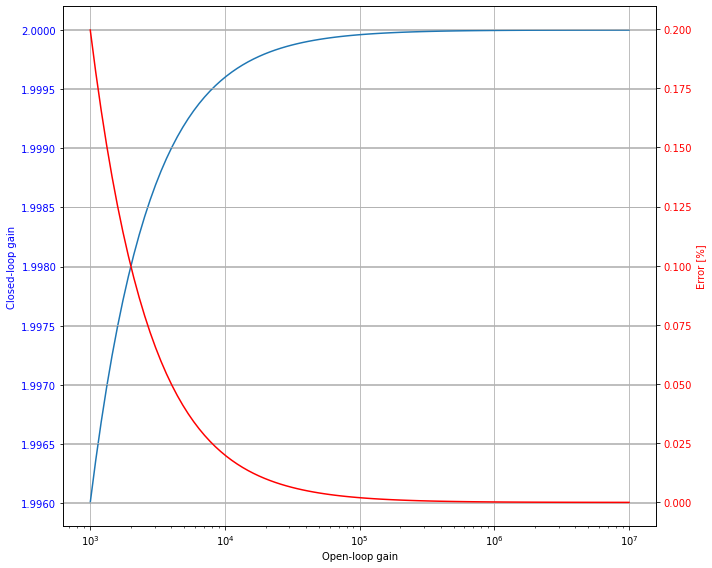

In [9]:
A0_vals = np.logspace(3,7,num=100)      # min: 20dB, max: 140dB
beta = 0.5                              # R1 = R2
G_vals = A0_vals/(1+beta*A0_vals)       # closed-loop gain
plot_logxy2_1axis(A0_vals, G_vals, 100*(1/beta-G_vals)/(1/beta), 'Open-loop gain', 'Closed-loop gain', 'Error [%]')

 - As the open-loop gain is increased we see a smaller error between the ideal and actual closed-loop gain values

## Input impedance

<center><img src="img/non_inverting_Zin.png" width=600 /></center>

$$ v^- \approx \dfrac{R_1}{R_1+R_2} \cdot v_o = \beta v_o$$

$$ v_o = A_v\cdot (v_t - v^-) = A_v\cdot (v_t - \beta v_o)$$

$$ v_o = \dfrac{A_v}{1+\beta A_v}\cdot v_t $$

$$ i_t =  \dfrac{v_t-\beta v_o}{R_{in}} = \dfrac{v_t-\beta v_o}{R_{in}} = \dfrac{(1+\beta A_v)\cdot v_t - \beta A_v v_t}{(1+\beta A_v)\cdot R_{in}}$$

$$ \boxed{R_{in,CL} = \dfrac{v_t}{i_t} = (1+\beta A_v)\cdot R_{in}} $$

 - Assuming minimal loading at the input and output of the opamp, the closed-loop input impedance is just $1+\beta A_v$ times that for the open-loop amplifier
 - This can be understood by the opamp "golden rule" related to equalization of the input voltages $v_+$ and $v_-$
 - A higher open-loop gain reduces the error voltage $v_+ - v_-$, minimizing $i_t$

## Output impedance

<center><img src="img/non_inverting_Zout.png" width=600 /></center>

$$ v_- = \beta v_t $$

$$ i_t = \dfrac{v_t}{R_1 + R_2} + \dfrac{(1+\beta A_v)}{R_{out}}\cdot v_t $$

$$ \dfrac{v_t}{i_t} = \dfrac{1}{\dfrac{1}{R_1+R_2} + \dfrac{1+\beta A_v}{R_{out}}} $$

\begin{align}
R_{out,CL} &= \dfrac{v_t}{i_t} = (R_1+R_2)\lvert \rvert\dfrac{R_{out}}{1+\beta A_v}\\
&\approx \boxed{\dfrac{R_{out}}{1+\beta A_v}}
\end{align}

 - Again ignoring loading due to finite input resistance, the open-loop output resistance is scaled, in this case reduced, by the factor $1+\beta A_v$
 - Feedback ensures that any change in output voltage is "compensated" by a change in the opamp input voltage $v_+ - v_-$, increasing the current through the opamp open-loop output resistance $R_{out}$
 - Once again we see that feedback is advantageous, as an ideal voltage source has zero output resistance, and feedback gets us closer to this goal

## Finite bandwidth

 - Real opamps cannot respond instantaneously to changes in their input voltages, and are subject to finite bandwidth
 - For most purposes, the *open-loop* frequency response of an opamp can be treated as first-order (single pole)
 - Opamp datasheets specify bandwidth as *transit frequency* or *gain-bandwidth* product, which for a first-order system is the product of the DC gain $A_0$ and the $3dB$ bandwidth $f_{3dB} = \dfrac{\omega_0}{2 \pi}$:
 
$$ f_t \approx A_0 \cdot f_{3dB} =  \dfrac{A_0\cdot \omega_0}{2\pi}$$

$$ A_v(j\omega) = \dfrac{A_0}{1+j\omega/\omega_0}$$

$$ |A_v(j\omega)| = \dfrac{A_0}{\sqrt{1+\omega^2/\omega_0^2}} $$

$$ |A_v(j\omega_t)| = \dfrac{A_0}{\sqrt{1+\omega_t^2/\omega_0^2}} = 1$$

$$ A_0^2 = 1 + \omega_t^2/\omega_0^2 \approx \omega_t^2/\omega_0^2$$

$$ \rightarrow \boxed{\omega_t \approx A_0\cdot \omega_0} $$

## Gain-bandwidth product

<center><img src="img/CE_bandwidth.png" width=400 /></center>

$$ A_0 = -g_m\cdot R_C $$

$$ \omega_0 = \dfrac{1}{R_C\cdot C_L}$$

$$ A_v(j\omega) = \dfrac{A_0}{1+j\omega/\omega_0}$$

$$ f_t \approx A_0 \cdot f_{3dB} =  \dfrac{g_m \cdot R_C}{2\pi \cdot R_C \cdot C_L} = \dfrac{g_m}{2\pi \cdot C_L}$$

 - Although opamps are significantly more complex, the concept of gain-bandwidth product can be demonstrated using a simple gain stage like the common-emitter amplifier 
 - Because the output resistance $R_C$ appears in the expressions for both gain and $3 dB$ bandwidth, an increase in $R_C$ increases gain while decreasing bandwidth, making their product constant
 - Gain and bandwidth for opamps are determined in a similar manner, just with different resistances and capacitances
 - Note that the dependence of bandwidth on $g_m$ indicates a tradeoff between speed and power, since $g_m$ depends on bias current

## Opamp frequency response

 - A typical opamp has DC gain ($A_0$) from $100-160dB$ and gain-bandwidth product ($f_t$) from $1-100MHz$
 - From these two parametsr we can determine the frequency response

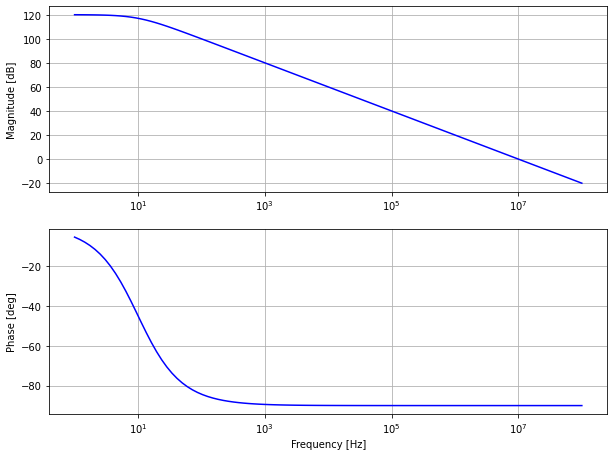

In [10]:
A_dB = 120
A_0 = 10**(A_dB/20)
f_3dB = f_t/A_0
w_0 = f_3dB*2*np.pi
f = np.logspace(0,8, num=100)
A_v = signal.TransferFunction([A_0], [1/w_0, 1])
w, mag, phase = A_v.bode(w=f*2*np.pi)               
plot_logxy2(f, mag, f, phase, 'Frequency [Hz]', 'Magnitude [dB]',
           'Frequency [Hz]', 'Phase [deg]')

 - Note that we didn't need the $3dB$ bandwidth to determine the frequency response!

## Closed-loop frequency response

 - We can readily determine the closed-loop frequency response using the following expression
 
$$ G(s) = \dfrac{A_v(s)}{1+\beta A_v(s)} $$
 
 - Substituting $ A_v(s) = \frac{A_0}{(1+s/\omega_0)} $ gives
 
$$ G(j\omega) = \dfrac{A_v(s)}{1+\beta A_v(s)} =  \dfrac{A_0}{1+s/\omega_0+\beta A_0}$$

 - We can solve for the pole location by setting the denominator equal to $0$:
 
$$ 1+s/\omega_0+\beta A_0 = 0 \rightarrow \boxed{s = -\omega_0\cdot(1+\beta A_0)} $$

 - The pole frequency is the *magnitude* of this expression
 
$$ \omega_{3dB,CL} = \lvert-\omega_0\cdot(1+\beta A_0)\rvert = \omega_0 \cdot (1+\beta A_0) = \omega_t (1+\beta A_0)/A_0 \approx \omega_t \cdot \beta$$

## Closed-loop bandwidth

 - From the preceding analysis, we see that the closed-loop pole frequency is approximately $1 + \beta A_0$ times *higher* than that of the open-loop pole
 - Like gain, input impedance, and output impedance, closed-loop bandwidth is scaled by the term $1 + \beta A_0$
 - It is important to note that while the closed-loop pole frequency changes with $1 + \beta A_0$, the gain-bandwidth product $f_t = A_0 \cdot f_{3dB}$ remains constant
 - However, the settling response of an amplifier is determined by $f_{3dB}$, based on the relation
 
 $$ \tau = \dfrac{2\pi}{f_{3dB,CL}} = \dfrac{1}{\omega_{3dB,CL}} \approx \dfrac{1}{\omega_0 \cdot(1+\beta A_0)}$$

 - Let's take a look at the closed-loop bandwidth as a function of the feedback factor $\beta$

In [6]:
def plot_CL_freq(A_dB, f_t, betas, w):
    A_0 = 10**(A_dB/20)
    w_0 = f_3dB*2*np.pi
    A_s = np.array([])

    fig, axs = plt.subplots(2, figsize=(10.0, 8.0))
    for b in betas:
        Av_cl = signal.TransferFunction([A_0], [1/w_0, 1 + b*A_0])
        w, mag, phase = Av_cl.bode(w=w)       # rad/s, dB, degrees 
        f = w/2/np.pi   

        # Plot the frequency response for multiple values of beta
        fig.suptitle('Opamp Closed-Loop Frequency Response')
        axs[0].semilogx(f, mag)
        axs[0].grid()
        axs[0].set_ylabel('Magnitude [dB]')
        axs[1].semilogx(f,phase)
        axs[1].grid()
        axs[1].set_ylabel('Phase [deg]')
        axs[1].set_xlabel('Frequency [Hz]')
        fig.align_ylabels(axs[:])
        
def plot_CL_step(A_dB, f_t, betas, w):
    A_0 = 10**(A_dB/20)
    w_0 = f_3dB*2*np.pi
    A_s = np.array([])
    
    fig, axs = plt.subplots(2, figsize=(10.0, 8.0))
    for b in betas:
        Av_cl = signal.TransferFunction([A_0], [1/w_0, 1 + b*A_0])
        tin = np.linspace(0,20e-6,100)
        u_step = np.concatenate( (0, np.ones(99)), axis=None)
        tout,vout = signal.step(Av_cl, X0=None, T=tin)

        # Plot the step response for multiple values of beta
        fig.suptitle('Opamp Closed-Loop Step Response')
        axs[0].plot(1e6*tout, b*vout)
        axs[0].grid()
        axs[0].set_ylabel(r'$\beta V_o$ [V]')
        axs[1].plot(1e6*tin,u_step)
        axs[1].grid()
        axs[1].set_ylabel('Input Voltage [V]')
        axs[1].set_xlabel('Time [$\mu $s]')
        fig.align_ylabels(axs[:])


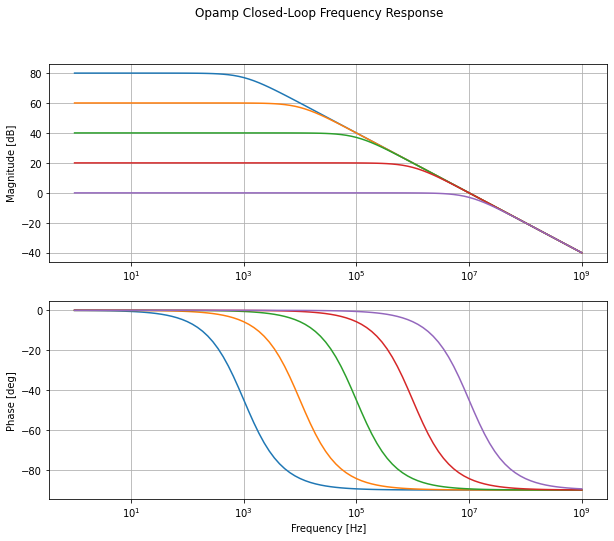

In [7]:
betas = np.logspace(-4, 0, num=5)
w = 2*np.pi*np.logspace(0,9,num=100)
plot_CL_freq(120, 10e6, betas, w)

 - As expected based on the frequency response, the settling time is inversely proportional to the factor $1+\beta A_0$

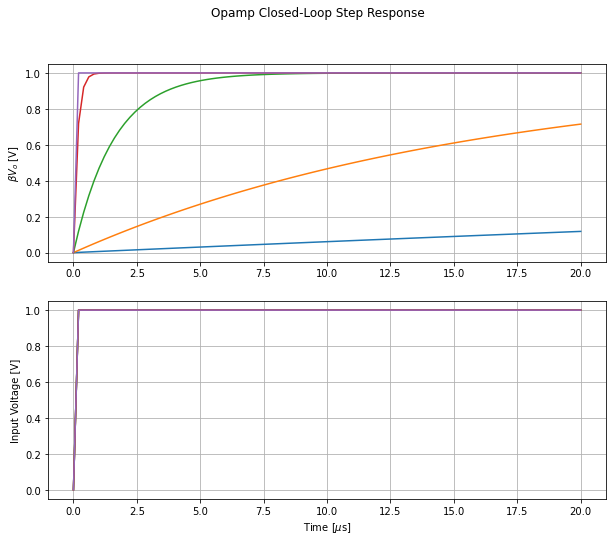

In [8]:
plot_CL_step(120, 10e6, betas, w)

## Input offset voltage

<center><img src="img/opamp_offset.png" width=400 /></center>

$$ v_o = A_v \cdot (v^+ - v^- - v_{os}) $$

 - Random variations in the characteristics of the transistors that comprise the opamp give rise to asymmetry in its behavior 
 - This is especially true of FET-based opamps, in which the threshold voltages of the input devices can differ by several millivolts
 - The asymmetry is modeled by a single "voltage" referred to as the offset 
 - To properly account for DC errors, the offset voltage should be included in our analysis of opamp circuits
 - Note that the offset voltage is merely a model - there is not a physical voltage source connected to the opamp terminals
 - Input offset also changes with temperature, a phenomenon referred to as "drift"

## Circuit analysis with offset

<center><img src="img/inverting_offset.png" width=600 /></center>

$$ \dfrac{v_{in}-v_{os}}{R_1} = \dfrac{v_{os}-v_{out}}{R_2} $$

$$v_{out} = -\dfrac{R_2}{R_1}\cdot v_{in} +  \left(1+\dfrac{R_2}{R_1}\right) \cdot v_{os} $$

 - Note that the input voltage $v_{in}$ "sees" the gain of the inverting amplifier, while the offset "sees" a non-inverting gain
 - In general, it is simpler to determine the effects of offset and input voltage on the ouput voltage separately, then combine them using superposition

## Alternative approach, using superposition

<center><img src="img/non_inverting_offset.png" width=500 /></center>

$$ v_{out} (v_{in}) =  -\dfrac{R_2}{R_1}\cdot v_{in} $$

$$v_{out} (v_{os}) = \left(1+\dfrac{R_2}{R_1} \right )\cdot v_{os} $$

\begin{align}
v_{out} &= v_{out} (v_{in}) + v_{out} (v_{os}) \\
\\
&= -\dfrac{R_2}{R_1}\cdot v_{in} + \left(1+\dfrac{R_2}{R_1} \right )\cdot v_{os}
\end{align}

 - For the offset, this circuit is (nearly, as we are ignoring finite gain) identical to the previous one 
 - Recall that the opamp will do whatever it takes equalize the voltage at its input terminals, so this configuration forces a "virtual offset" at the inverting terminal
 - This approach is more intuitive, since we can follow the path to the output for the input and offset separately
 - We will follow a similar approach when analyzing the effect of opamp noise on amplifier precision

## Input bias current

<center><img src="img/opamp_bias_current.png" width=500 /></center>

$$ v^- = 0$$

$$ I_{R1} = 0 $$

$$I_{R2} = I_B $$

$$ V_{out} (I_B) = I_B R_2 $$

 - Opamp input currents cause an offset error in the output voltage proportional to the resistance of the feedback network
 - Input currents can be as low as single-digit picoamperes (FET inputs), or into the microampere range (BJT inputs)
 - Here we are considering only the bias current, use superposition to combine this with the appropriate configuration for the input voltage (i.e. inverting or non-inverting amplifier)
 - To avoid large voltage errors, use smaller resistances (but not so small as to load the opamp) 

## Bias current compensation

<center><img src="img/bias_current_compensation.png" width=500 /></center>

$$ v^+ = -I_BR_3 = v^- $$

$$ V_{out} = I_BR_2 - \left(1+\dfrac{R_2}{R_1} \right) \cdot I_B R_3  = 0$$

$$ \rightarrow \boxed{R_3 = R_1||R_2} $$

 - A solution is to add a resistor $R_3$ to the non-inverting terminal of the opamp to counteract the output offset voltage due to $I_B$
 - If the value of $R_3$ is equal to the *parallel combination of $R_1$ and $R_2$, the offset can be "cancelled"  
 - Because $R_1$ and $R_2$ won't match perfectly, it is good practice to keep them as small as possible
 - The minimum values of $R_1$ and $R_2$ depending on loading effects, both at the circuit input and opamp output

## Input offset current

<center><img src="img/input_offset_current.png" width=500 /></center>

$$ I_{OS} = I_B^+ - I_B^-$$

\begin{align}
V_{out} &= - \left(1+\dfrac{R_2}{R_1} \right)I_B^+R_3 + I_B^-R_2 \\
\\
&= R_2 \left(I_B^- - I_B^+ \right) = R_2\cdot I_{OS} 
\end{align}



 - Input bias current can be managed using balanced (i.e. matched) circuits, as in the previous example
 - However, a mismatch between $I_B^+$ and $I_B^-$ ($I_{OS}$) will still cause an error
 - The only recourse in this case is to use small resistance values in the feedback network (while still ensuring minimal loading of the opamp output)
 - Input offset current is typically around 10 – 25% of input bias current

## TI LM741 specifications

<center><img src="img/LM741.png" width=1000 /></center>

| Parameter | Typical value |
| :---------| :------------:|
| Open-loop gain | $106 dB$   |
| Bandwidth ($f_t$) | $1.5 MHz$ |
| Input resistance | $2 M\Omega$ |
| Input offset voltage | $ 1mV$ |
| Offset voltage drift | $15 \mu V/^\circ C$| 
| Input bias current | $80 nA$ |
| Input offset current | $20 nA$ |
| Supply current | $1.67 mA$ |